<a href="https://colab.research.google.com/github/Nikitoniy/Yandex_Data_Analysis/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%91%D0%B8%D0%B7%D0%BD%D0%B5%D1%81_%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Анализ убытков приложения Procrastinate Pro+.

**Описание проекта:** для приложения Procrastinate Pro+ необходимо провести маркетинговую аналитику. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Основная задача — разобраться в причинах и помочь компании выйти в плюс.

**Цель:** необходимо проанализировать вложения в рекламу для приложения Procrastinate Pro+. Для этого подготовлены три базы данных с посещениями, заказами и вложениях в рекламу. Необходимо проанализировать данные в таблицах и предобработать перед анализом показателей. Нужно проанализировать вложения в рекламные кампании. Для этого будут рассмотрены общие вложения в рекламу и в разрезе категориальных показателей в таблицах. Также необходимо рассмотреть такие показатели, как LTV, ROI, CAC, удержание и разобраться в причинах убыточности компании.

**Описание исходных данных (таблиц):**

Для анализа представлено три таблицы (информация о пользователях, привлечённых с 1 мая по 27 октября 2019 года):
- Структура `visits_info_short.csv` - информация о посещениях сайта:
    - `User Id` — уникальный идентификатор пользователя,
    - `Region` — страна пользователя,
    - `Device` — тип устройства пользователя,
    - `Channel` — идентификатор источника перехода,
    - `Session Start` — дата и время начала сессии,
    - `Session End` — дата и время окончания сессии.
- Структура `orders_info_short.csv` - информация о заказах:
    - `User Id` — уникальный идентификатор пользователя,
    - `Event Dt` — дата и время покупки,
    - `Revenue` — сумма заказа.
- Структура `costs_info_short.csv` - информация о расходах на рекламу:
    - `dt` — дата проведения рекламной кампании,
    - `Channel` — идентификатор рекламного источника,
    - `costs` — расходы на эту кампанию.

### Загрузим данные и подготовьте их к анализу

#### Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

#### Подготовка таблиц

In [ ]:
visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv')
costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv')

#функция для вывода первичной информации по всем таблицам
def info_about_tables(data):
    #Использую название + саму таблицу
    for df_name, df in data.items():
        print(f"--- {df_name} ---")
        print("Head:")
        display(df.head())
        print("\nInfo:")
        display(df.info())
        print("\n\n")

data = {
       'Данные о визитах': visits,
       'Данные о заказах': orders,
       'Данные о рекламных расходах': costs
       }
info_about_tables(data)

--- Данные о визитах ---
Head:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None




--- Данные о заказах ---
Head:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None




--- Данные о рекламных расходах ---
Head:


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

**Промежуточные итоги:**

Данные по таблице `visits`:
- Пропуски не обнаружены;
- Необходимо преобразовать тип колонок на верный у следующих колонок:
    - `Session Start` - сейчас object, а должна быть дата;
    - `Session End` - сейчас object, а должна быть дата.
    
Данные по таблице `orders`:
- Пропуски не обнаружены;
- Необходимо преобразовать тип колонок на верный у следующих колонок:
    - `Event Dt` - сейчас object, а должна быть дата.
    
Данные по таблице `orders`:
- Пропуски не обнаружены;
- Необходимо преобразовать тип колонок на верный у следующих колонок:
    - `dt` - сейчас object, а должна быть дата.

#### Изменение наименования колонок

Изменим наименования колонок для исключений лишних пробелов и больших букв для упрощенного использования наименований в дальнейшем.

In [ ]:
#привожу к нижнему регистру все колонки и меняю пробел на "_"
visits.columns = [col.lower().replace(' ', '_') for col in visits.columns]

orders.columns = [col.lower().replace(' ', '_') for col in orders.columns]

costs.columns = costs.columns.str.lower()

#### Изменение типов колонок в таблицах

In [ ]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#проверка таблиц
info_about_tables(data)

--- Данные о визитах ---
Head:


,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None




--- Данные о заказах ---
Head:


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None




--- Данные о рекламных расходах ---
Head:


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

**Промежуточные итоги:** В процессе первичной предобработки таблиц изменил наименовнаия колонок для упрощенного взаимодействия с ними. Также были изменены типы колонок, согласно замечаниям. После изменения и проверки таблиц можно убедиться в том, что все данные отображаются корректно, а также все типы колонок определены правильно.

#### Анализ дубликатов в таблицах

##### Проверка таблицы с данными о посещениях

In [ ]:
display('Полных дубликатов в датасете: {}'.format(visits.duplicated().sum()))

display(
        'Дубликатов пользователей: {}'
        .format(visits[visits.duplicated(subset=['user_id'], keep=False)]['user_id'].count())
        )

display(
        'Дубликатов пользователей и региона: {}'
        .format(visits[visits.duplicated(subset=['user_id', 'region'], keep=False)]['user_id'].count())
        )

display(
        'Дубликатов пользователей и начала сессии: {}'
        .format(visits[visits.duplicated(subset=['user_id', 'session_start'], keep=False)]['user_id'].count())
        )

display(
        'Дубликатов пользователей и окончания сессии: {}'
        .format(visits[visits.duplicated(subset=['user_id', 'session_end'], keep=False)]['user_id'].count())
        )

'Полных дубликатов в датасете: 0'

'Дубликатов пользователей: 237398'

'Дубликатов пользователей и региона: 237398'

'Дубликатов пользователей и начала сессии: 0'

'Дубликатов пользователей и окончания сессии: 0'

In [ ]:
display(
        'Уникальные названия устройств пользователей: {}'
        .format(visits['device'].unique()
               )
        )

display(
        'Уникальные названия источников перехода пользователей: {}'
        .format(visits['channel'].unique()
                )
        )

display(
        'Уникальные названия регионов пользователей: {}'
        .format(visits['region'].unique()
                )
        )

"Уникальные названия устройств пользователей: ['iPhone' 'Mac' 'Android' 'PC']"

"Уникальные названия источников перехода пользователей: ['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'\n 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'\n 'lambdaMediaAds']"

"Уникальные названия регионов пользователей: ['United States' 'UK' 'France' 'Germany']"

**Промежуточные выводы по таблице `visits`:**
- Полные дубликаты отсутствуют;
- Дубликаты в части пользователей и пользователей с регионом совпадают - это говорит о том, что индефикаторы пользователей присвоены корректно. <u>Всего таких дубликатов 237.398</u>.
- Дубликатов в части пользователей и начала/окончания сессии не обнаружено;
- Уникальные названия устройств, источников и регионов пользователей не повторяются/ не похожи на друг друга - это говорит о том, что дубликатов также остутсвутют.

Отсюда можно сделать вывод о том, что все дубликаты в таблицу попали "естественным путем" и далее таблица в предобработке дубликатов не нуждается.

##### Проверка таблицы с данными о заказах

In [ ]:
display('Полных дубликатов в датасете: {}'.format(orders.duplicated().sum()))

display(
        'Дубликатов пользователей: {}'
        .format(orders[orders.duplicated(subset=['user_id'], keep=False)]['user_id'].count())
        )

display(
        'Дубликатов пользователей и даты покупки: {}'
        .format(orders[orders.duplicated(subset=['user_id', 'event_dt'], keep=False)]['user_id'].count())
        )

'Полных дубликатов в датасете: 0'

'Дубликатов пользователей: 37072'

'Дубликатов пользователей и даты покупки: 0'

**Промежуточные выводы по таблице `orders`:**
- Полные дубликаты отсутствуют;
- Дубликаты пользователей вместе с датой и временем покупки отсутствуют;
- Дубликаты в части индефикаторов пользователей составляет <u>37.072</u>.

Так как дубликатов пользователей вместе с их датой оплаты не обнаружено, то в таком случае такие дубликаты можно не преобразовывать.

##### Проверка таблицы с данными о рекламных расходах

In [ ]:
display('Полных дубликатов в датасете: {}'.format(costs.duplicated().sum()))

display(
        'Дубликатов даты рекламной кампании и источника: {}'
        .format(costs[costs.duplicated(subset=['dt', 'channel'], keep=False)]['channel'].count())
        )

display(
        'Уникальные названия рекламных источников: {}'
        .format(costs['channel'].unique()
                )
        )

'Полных дубликатов в датасете: 0'

'Дубликатов даты рекламной кампании и источника: 0'

"Уникальные названия рекламных источников: ['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'\n 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'\n 'lambdaMediaAds']"

**Промежуточные выводы по таблице `costs`**:
- Полных дубликатов не обнаружено;
- Дубликатов даты проведения рекламной кампании и ее истоника не обнаружено;
- Уникальные значения не повторяются/не похожи друг на друга.

Каких-либо дубликатов не обнаружено, поэтому данную таблицу можно не предобрабатывать в части дубликатов.

**Промежуточные итоги по всем таблицам:**
- Полные дубликаты не обнаружены ни в одной таблице;
- Дубликаты пользователей встречаются, но это связано не с ошибками, а с многократным взаимодействием пользователей с платформой. Такие дубликаты составили:
    - В таблице с `посещениями` 237.398;
    - В таблице с `заказами` 37.072.
- Также были проанализированные уникальные названия в "текстовых" колонках во всех таблицах - дубликатов не обнаружено.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.


#### Функция для создания профилей пользователей

In [ ]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция для расчета удержания пользователей

In [ ]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчета конверсии

In [ ]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### Функция для расчёта LTV и ROI

In [ ]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функция для сглаживания данных

In [ ]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

#### Фукнция для визуализации удержания пользователей

In [ ]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

#### Функция для визуализации конверсии

In [ ]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция для визуализации LTV и ROI

In [ ]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Промежуточный итог:** были добавлены функции для:

- Вычисления значений метрик:

    - `get_profiles()` — для создания профилей пользователей,
    - `get_retention()` — для подсчёта Retention Rate,
    - `get_conversion()` — для подсчёта конверсии,
    - `get_ltv()` — для подсчёта LTV.

- Построения графиков:

    - `filter_data()` — для сглаживания данных,
    - `plot_retention()` — для построения графика Retention Rate,
    - `plot_conversion()` — для построения графика конверсии,
    - `plot_ltv_roi` — для визуализации LTV и ROI.

### Исследовательский анализ данных

#### Профили пользователей

In [ ]:
profiles = get_profiles(visits, orders, costs)

profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Здесь же можно определить минимальную и максимальную дату привлечения пользователей.

In [ ]:
display(profiles.first_ts.dt.date.min())

display(profiles.first_ts.dt.date.max())

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

**Промежуточные выводы:** В созданной таблице `profiles` находятся профили пользователей. Отсюда же определил максимальную минимальную дату привлечения (01.05.2019) и максимальную дату привлечения пользователей (27.10.2019). Данные даты определены верно, так как они сходятся с описанием таблиц.

#### Анализ пользователей в разрезе стран

Для того, чтобы вычислять долю плательщиков в различных категориях, напишем функцию.

In [ ]:
#функция для создания таблиц с долями плательщиков
#на входе таблица + колонока
def get_ratio_diff(df, different):
    #группировка по указанной колонке и подсчет пользователей
    pivot_ratio = df.groupby(different).agg({'user_id': 'nunique', 'payer': 'sum'})
    pivot_ratio.reset_index(inplace=True)
    pivot_ratio['ratio'] = round((pivot_ratio['payer'] / pivot_ratio['user_id'])*100, 2)
    pivot_ratio.columns = [f'Разрез по: {pivot_ratio.columns[0]}',
                           'Всего уникальных',
                           'Всего плательщиков',
                           'Доля плательщиков']
    pivot_ratio = pivot_ratio.sort_values('Доля плательщиков', ascending=False)

    #визуализация через столбчатую диаграмму
    #задаю размер графика
    plt.figure(figsize=(15,7))
    #сам график строю через номера колонок
    sns.barplot(data=pivot_ratio, x=pivot_ratio.columns[0], y=pivot_ratio.columns[-1])
    plt.title(f'Доля плательщиков в разрезе. {pivot_ratio.columns[0]}', fontsize=15)
    plt.xlabel(different, fontsize=14)
    plt.ylabel(pivot_ratio.columns[-1], fontsize=14)
    plt.show()
    return pivot_ratio

Проверим функцию и создадим график с таблицей доли плательщиков в разере стран

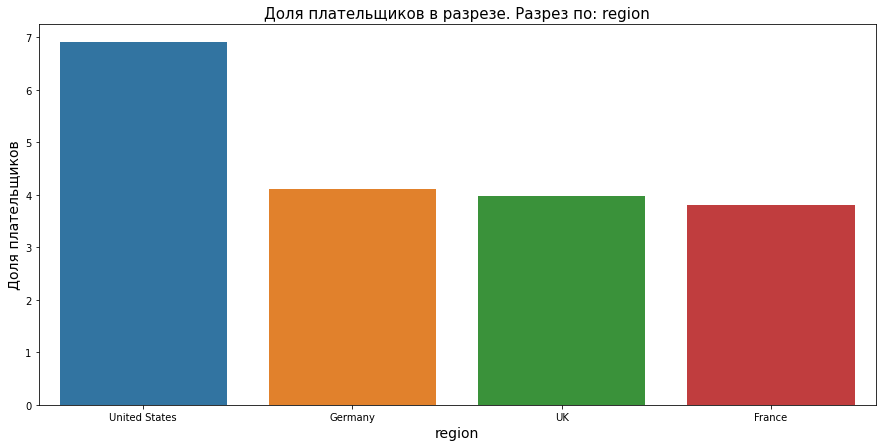

,Разрез по: region,Всего уникальных,Всего плательщиков,Доля плательщиков
3,United States,100002,6902,6.90
1,Germany,14981,616,4.11
2,UK,17575,700,3.98
0,France,17450,663,3.80


In [ ]:
get_ratio_diff(profiles, 'region')

**Промежуточные выводы:** Построена таблица в разрезе стран пользователей. Больше всего уникальных пользователей (<u>100.002</u>), всего плательщиков (<u>6.902</u>) и доля плательщиков (<u>7%</u>) приходится на `США`. Далее доля плательщиков одинаково распределено по остальным странам - по <u>4%</u> плательщиков в каждой стране.

#### Анализ пользователей в разрезе устройств

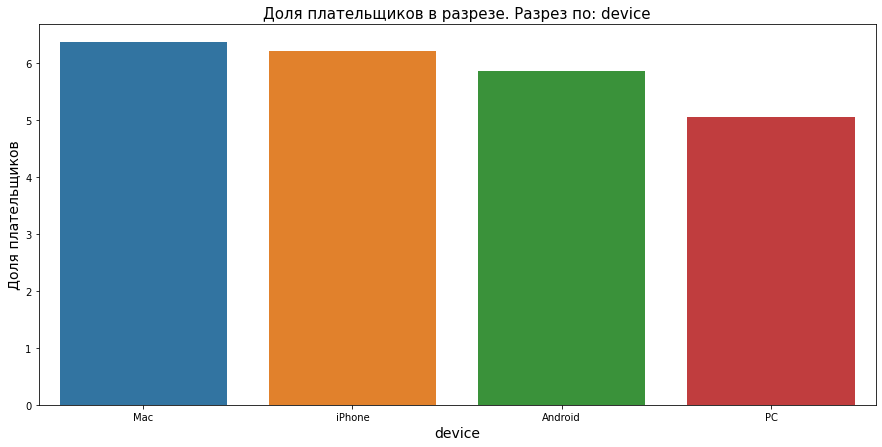

,Разрез по: device,Всего уникальных,Всего плательщиков,Доля плательщиков
1,Mac,30042,1912,6.36
3,iPhone,54479,3382,6.21
0,Android,35032,2050,5.85
2,PC,30455,1537,5.05


In [ ]:
get_ratio_diff(profiles, 'device')

**Промежуточный итог:** Построена таблица в разрезе устройств пользователей. Стоит отметить, что доля платящих пользователей у большинства девайсов одинаковая - 6%, кроме ПК - доля таких пользователей 5%. При этом большинство уникальных и платящих пользователей - <u>54.479</u> и <u>3.382</u> соответственно - <u>пользуются Айфоном</u>.

#### Анализ пользователей в разрезе рекламных источников

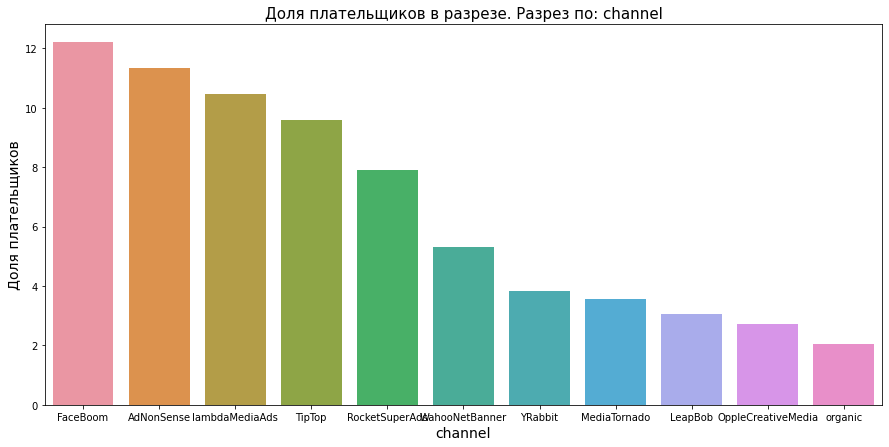

,Разрез по: channel,Всего уникальных,Всего плательщиков,Доля плательщиков
1,FaceBoom,29144,3557,12.20
0,AdNonSense,3880,440,11.34
9,lambdaMediaAds,2149,225,10.47
6,TipTop,19561,1878,9.60
5,RocketSuperAds,4448,352,7.91
7,WahooNetBanner,8553,453,5.30
8,YRabbit,4312,165,3.83
3,MediaTornado,4364,156,3.57
2,LeapBob,8553,262,3.06
4,OppleCreativeMedia,8605,233,2.71


In [ ]:
get_ratio_diff(profiles, 'channel')

**Промежуточный итог:** Построена таблица в разрезе рекламных источников привлечения пользователей.

Отметим интересные моменты:
- Доля плательщиков:
    - БОльшая доля плательщиков приходит из источников FaceBoom (12%), AdNonSense(11%), TipTop(10%);
    - Меньше всего доля занимает из источников organic (2%), LeapBob и OppleCreativeMedia (по 3%);
- Всего плательщиков:    
    - Всего плательщиков приходит из источников FaceBoom (3.557), TipTop (1.878), organic (1.160);
    - Меньше всего плательщиков у источников MediaTornado и YRabbit (до 200 плательщиков);
- Уникальные пользователи:
    - Уникальных пользователей больше всего из источников organic (56.439), FaceBoom (29.144), TipTop (19.561);
    - Уникальных пользователей менее у источников MediaTornado и YRabbit (до 5.0000 плательщиков).
    
Здесь можно выделить явных лидеров по совокупности показателям - <u>FaceBoom и TipTop</u>.

**Промежуточный вывод:** построены таблицы в разрезе стран пользователей, их устройств и рекламных источников.

Выделим важные наблюдения:
- БОльшая доля плательщиков и их количество составили в `США` (7% из 100 тысяч уникальных пользователей);
- Между устройствами доля плательщиков одинаковая (5%-6%), но уникальных пользователей и, соответственно, плательщиков больше у пользователей с `Айфоном`;
- Явные лидеры среди рекламных источников в части плательщиков у `FaceBoom` (12% плательщиков из 29 тысяч пользователей) и `TipTop` (10% плательщиков из 19 тысяч пользователей);
- Меньше всего плательщиков среди `органических` пользователей, но больше всего пользователей органических (2% плательщиков из 56 тысяч пользователей).

### Исследование маркетинга


#### Общая сумма расходов на маркетинг

In [ ]:
display('Всего на рекламу потрачено: {}'.format(round(costs['costs'].sum(), 2)))

'Всего на рекламу потрачено: 105497.3'

#### Распределение трат по рекламным источникам

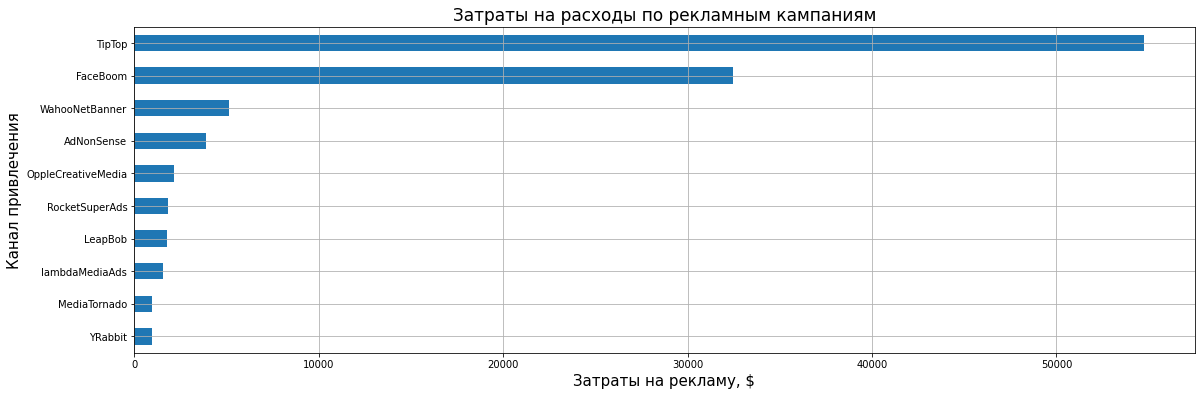

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


In [ ]:
#таблица с расходами
costs_channels = (costs
                     .groupby('channel')
                     .agg({'costs': 'sum'})
                     )

#визуализация столбчатая
costs_channels.sort_values('costs', ascending=True).plot(kind='barh', figsize=(19,6), legend = False,  grid=True)

plt.xlabel('Затраты на рекламу, $', fontsize = 15)
plt.ylabel('Канал привлечения', fontsize = 15)
plt.title('Затраты на расходы по рекламным кампаниям', fontsize = 17)
plt.show()

display(costs_channels.sort_values('costs', ascending=False))

**Промежуточный итог:** Всего потрачено на рекламу: <u>105 тысяч долларов</u>. Больше всего расходов пришлось на сервис `TipTop` <u>~55 тысяч долларов</u>. Менее всего потрачено на рекламу у сервисов YRabbit, MediaTornado - менее тысячи долларов.

Стоит отметить, что расходы на сервис TipTop сильно превышают остальные сервисы, при этом доля плательщиков у данного сервиса составляет до 10%.

#### Изменения расходов на рекламные сервисы по датам

##### Добавление новых колонок

Последующая визуализация будет содержать в себе расходы по рекламным сервисам в разрезе недель и месяцев. Для данных разрезов добавим в таблицу `costs` недели и месяцы.

In [ ]:
#копирую таблицу
cost_week_month = costs.copy()

#добавляю номера недель и месяцы
cost_week_month['dt'] = pd.to_datetime(cost_week_month['dt'])
cost_week_month['week'] = cost_week_month['dt'].dt.isocalendar().week
cost_week_month['month'] = cost_week_month['dt'].dt.month

cost_week_month.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


**Промежуточный итог:** была создана копия таблицы `costs`, в которую добавил колонки с номером недели, а также колонка с выделенным месяцем. На данный момент можно приступать к визуализации.

##### Рекламные расходы по неделям

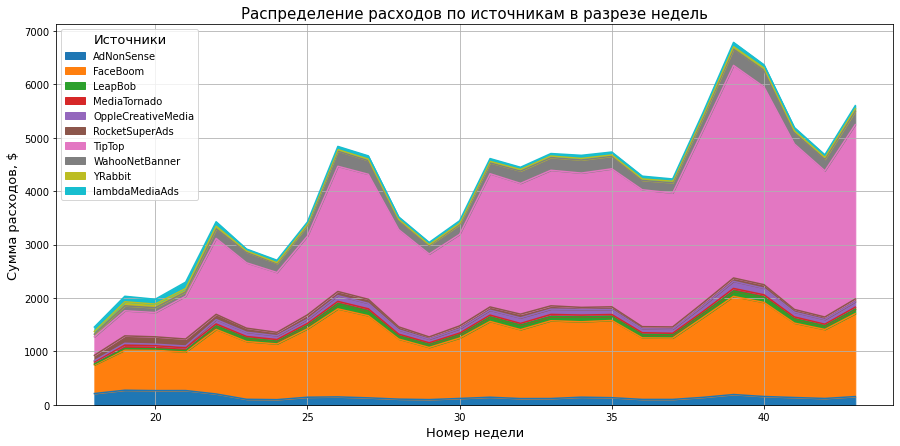

In [ ]:
#создаю таблицу с распределением каналов и недель по расходам
week_pivot = cost_week_month.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum')


week_pivot.plot.area(figsize = (15, 7), grid=True)
plt.title('Распределение расходов по источникам в разрезе недель', fontsize = 15)
plt.legend().set_title('Источники', prop={'size': 13})
plt.ylabel('Сумма расходов, $', fontsize = 13)
plt.xlabel('Номер недели', fontsize = 13)
plt.show()

**Промежуточный итог:** на графике видно явное преимущество рекламных источников TipTip и FaceBoom.

Также есть два пиковых значения в расходах на рекламу в этих сервисах:
- 26 - 28 неделя - FaceBoom до 2 тысяч и у TipTop до 5 тысяч;
- 36 - 38 неделя - FaceBoom свыше 2 тысяч и у TipTop до 7 тысяч.

##### Рекламные расходы по месяцам

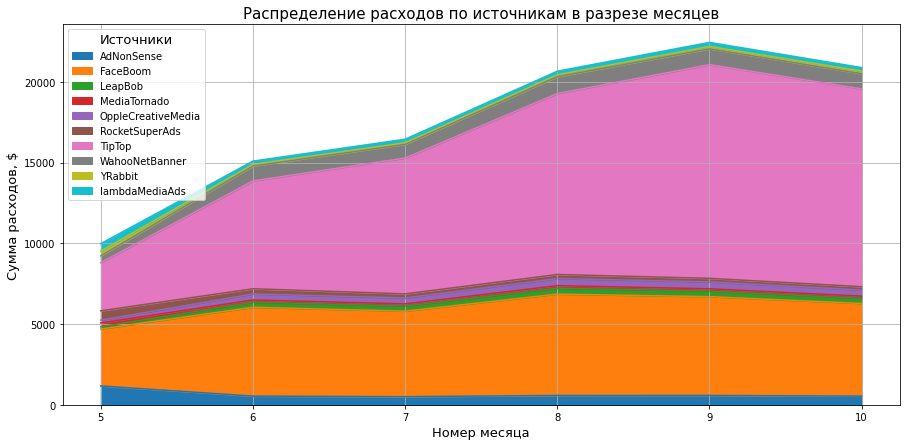

In [ ]:
#создаю таблицу с распределением каналов и месяцев по расходам
week_pivot = cost_week_month.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')


week_pivot.plot.area(figsize = (15, 7), grid=True)
plt.title('Распределение расходов по источникам в разрезе месяцев', fontsize = 15)
plt.legend().set_title('Источники', prop={'size': 13})
plt.ylabel('Сумма расходов, $', fontsize = 13)
plt.xlabel('Номер месяца', fontsize = 13)
plt.show()

**Промежуточный итог:** на данном графике также видно <u>преимущество</u> двух источников: `TipTop` и `FaceBoom`. При этом прослеживается повышение расходов на рекламу у сервиса `TipTop` с пиком <u>в сентябре (более 20 тысяч)</u>. Стоит отметить, что такого плавного повышения расходов у источника FaceBoom не имеется.

#### Стоимость привлечения каждого пользователя из источников

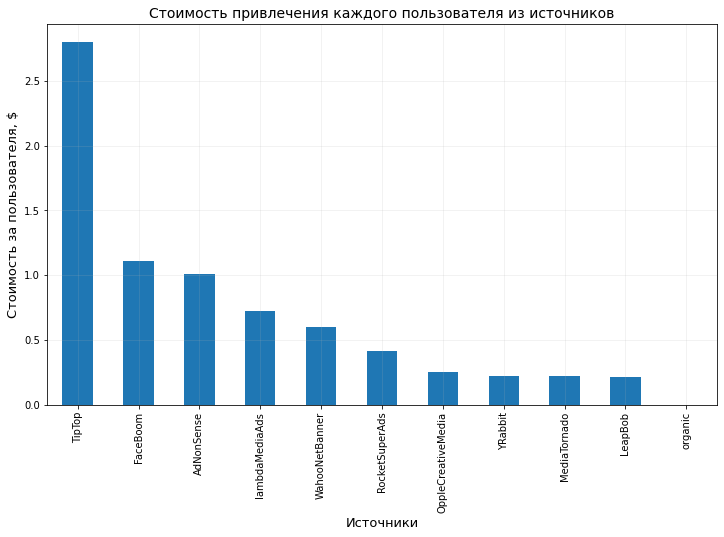

In [ ]:
cost_mean = (profiles
             .groupby('channel')
             .agg({'acquisition_cost': 'mean'})
             .sort_values(by='acquisition_cost', ascending=False))
cost_mean.plot(kind='bar', legend=False, figsize=(12, 7))
plt.grid(alpha=0.2)
plt.title('Стоимость привлечения каждого пользователя из источников', fontsize=14)
plt.ylabel('Стоимость за пользователя, $', fontsize=13)
plt.xlabel('Источники', fontsize=13)
plt.show()

**Промежуточные итоги:** на графике видно, что дороже всего пользователь стоит в источнике `TipTop` - более 2.5 долларов за пользователя. Интересно, что лидеры по привлеченным пользователям `FaceBoom` и `AdNonSense` обходятся всего за ~1 доллар за пользователя. Думаю, это связано с большим разрывом в расходах между сервисом `FaceBoom` и другими.

**Промежуточные итоги:** на данном шаге были проанализированны расходы на маркетинг, включая расходы по источникам и различным временным интервалам.

Выделим интересные моменты:
- Половину расходов составляет сервис `TipTop` - более 50 тысяч долларов, а также на графиках по периодам можно увидеть, что расходы на рекламу у сервиса только повышаются (с августа по октябрь расходы составили более 20 тысяч долларов). При этом данный сервис не является лидером по привлечению покупателей (до 2 тысяч привлеченных покупателей - менее 10% от всех пользователей), а также у данного сервиса выходит в среднем самое дорогое привлечение пользователя - более 2.5 долларов за пользователя;
- Далее выделяется сервис `FaceBoom` - второй по совокупности расходов (расходы на источник составили более 30 тысяч долларов). Но в случае с `FaceBoom` - сервис является лидером по привлеченным покупателям (до 30 тысяч привлеченных пользователей, из которых 12% покупатели). Также у сервиса нет явного повышения расходов с каждым новым месяцем (в основном расходы составляют от 6 тысяч до 8 тысяч долларов). В совокупности со всем вышесказанным сервис является вторым по стоиомости пользователей ~1 доллар за пользователя.

### Оценка окупаемость рекламы

#### Подготовка данных (дат) для анализа бизнес-показателей

In [ ]:
#момент анализа
observation_date = datetime(2019, 11, 1).date()

#горизонт анализа
horizon_days = 14

#игнорировать горизонт
ignore_horizon = False

#максимальная дата с горизонтом анализа
last_suitable_acquisition_date= observation_date - timedelta(days=horizon_days - 1)

**Промежуточный итог:** были добавлены новые переменные, из них момент анализа - 1 ноября 2019 года и горизонт анализа - 2 недели (14 дней), а также переменная с "игнорированием горизонта анализа" и максимальная дата анализа с учетом горизонта анализа.

#### Анализ окупаемости рекламы

Для начала визуализируем общую конверсию

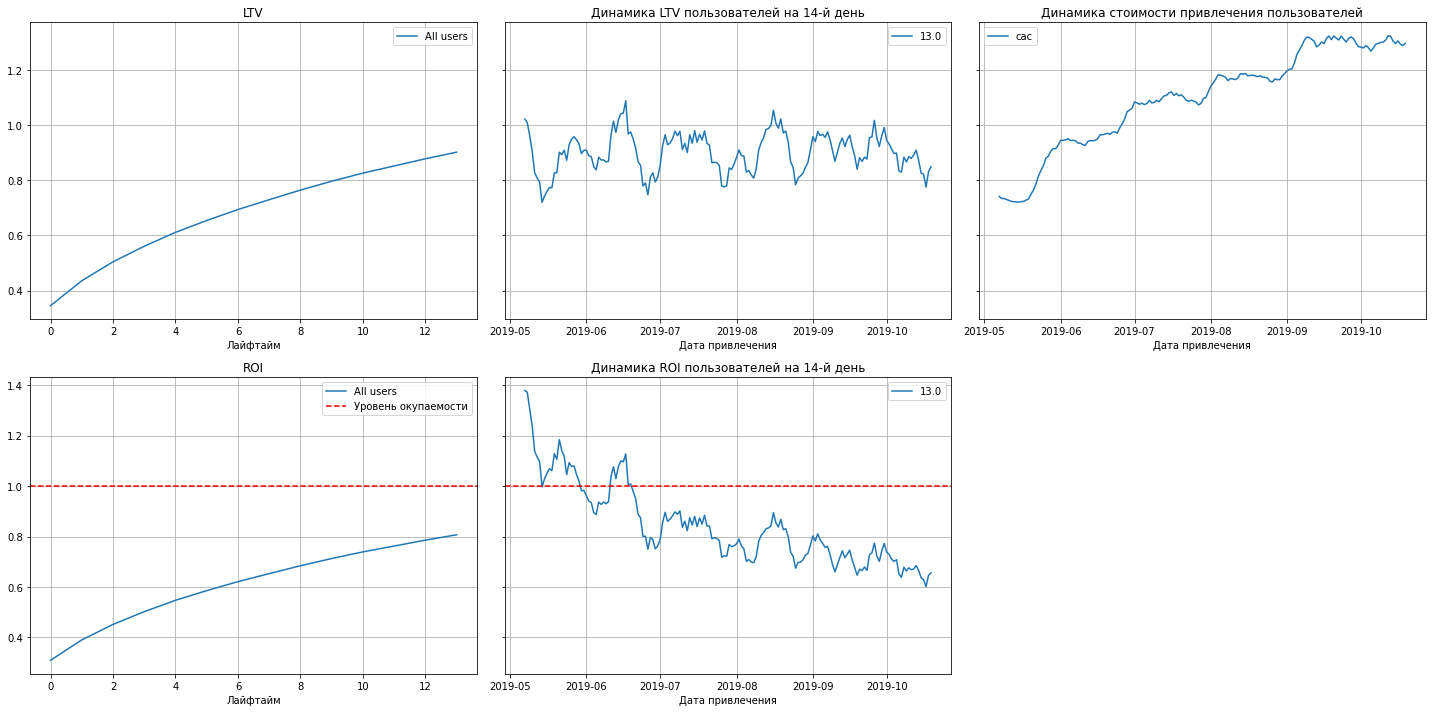

In [ ]:
#убираю органических пользователей
profiles_without_organic = profiles.query('channel != "organic"')

#получаю данные с помощью функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
                                                                      profiles_without_organic,
                                                                      orders,
                                                                      observation_date,
                                                                      horizon_days
                                                                      )

#визуализация
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Промежуточный итог:** судя по графикам, затраченные средства не окупаются (<u>ROI чуть выше 80%</u>), в то время, как стоимость привлечения только растет. При этом динамика ROI с каждым месяцем уменьшается, но LTV в то же время стабильно растет.

#### Общая конверсия пользователей и их удержание

Для начала построим графики динамики конверсии пользователей

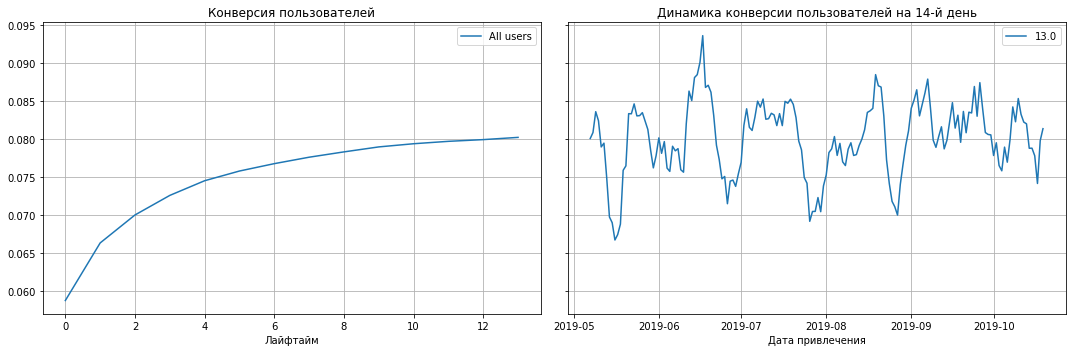

In [ ]:
#получаю данные о конверсии с помощью функции
conversion_raw, conversion_grouped, conversion_history = get_conversion(
                                                                        profiles_without_organic,
                                                                        orders,
                                                                        observation_date,
                                                                        horizon_days
                                                                        )

#визуализация
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Промежуточный итог:** по графикам видно, что за первые 4 жизни пользователей конверсия разко растет, далее рост конверсии также присутсвтует, но уже более плавный. Хочу отметить, что конверсия пользователей, привлеченных в мае, достигает минимальнх значений по сравнению с другими периодами - это может говорить о том, что в этот период пользователи столкнулись с чем-то особенным.

Далее построим графики с удержанием пользователей

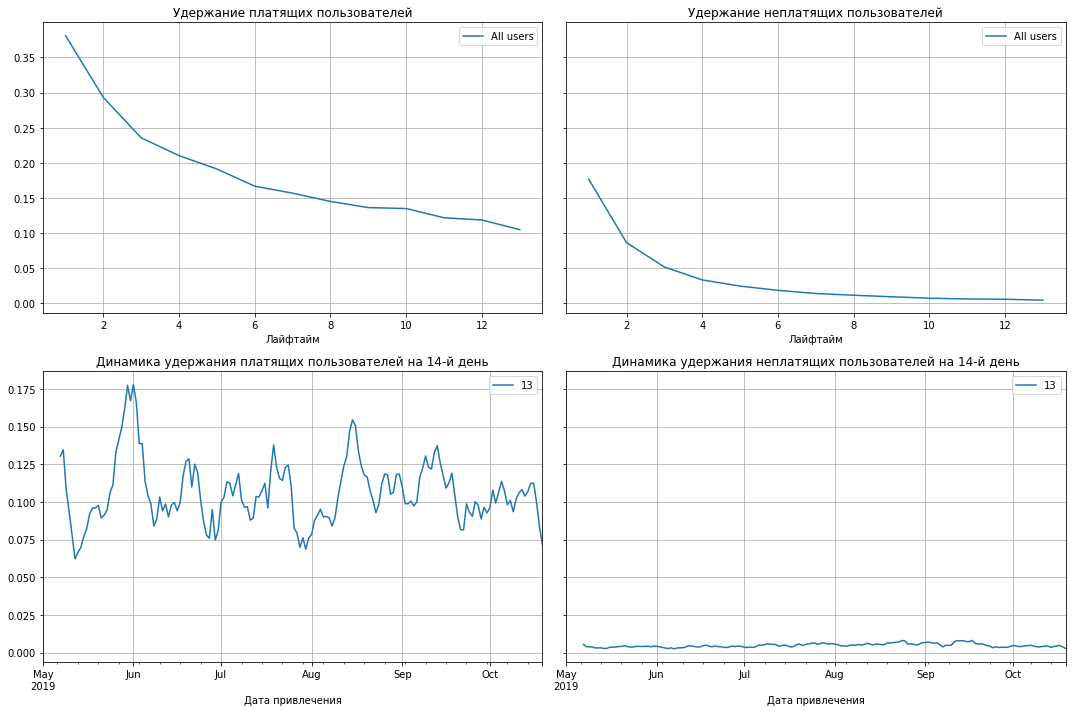

In [ ]:
#таблица с данными удержаний
retention_raw, retention_grouped, retention_history = get_retention(
                                                                    profiles_without_organic,
                                                                    visits,
                                                                    observation_date,
                                                                    horizon_days
                                                                    )

#визуализация
plot_retention(retention_grouped, retention_history, horizon_days)

**Промежуточный итог:** интересно, что удержание неплатящих пользователей намного ниже, чем удержание платящих. Неплятящие пользователи стабильно плохо удерживаются. При этом удеражние платящик пользователей в пике (в первый день) составяет 40%.

#### Анализ окупаемости рекламы в разбивке по устройствам

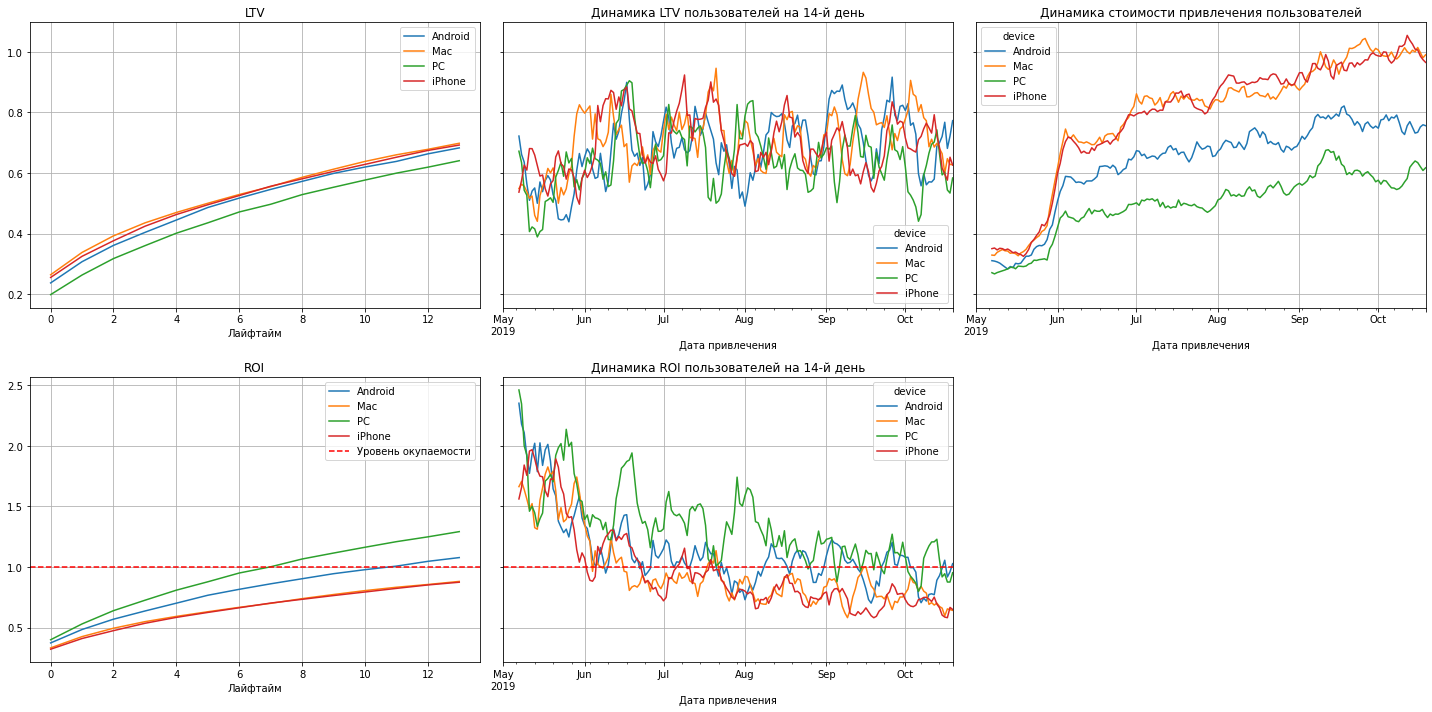

In [ ]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
                                                                      profiles,
                                                                      orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=dimensions
                                                                      )

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Промежуточный итог:** LTV пользователей всех устроиств стабильно растёт. LTV держателей `ПК` ниже, чем пользователей с других устройств, при этом окупается только эта категория пользователей. Со временем затраты на привлечение держателей Айфона и МАКа значительно выше (~20%), чем привлечение пользователей с `Андроида` и `ПК`.

Интересно, что с сентября никакие пользователи не окупаются.

#### Попробуем узнать в чем причина: в низкой конверсии или низком удержании

##### Для этого построим графики конверсии с разбивкой по устройствам

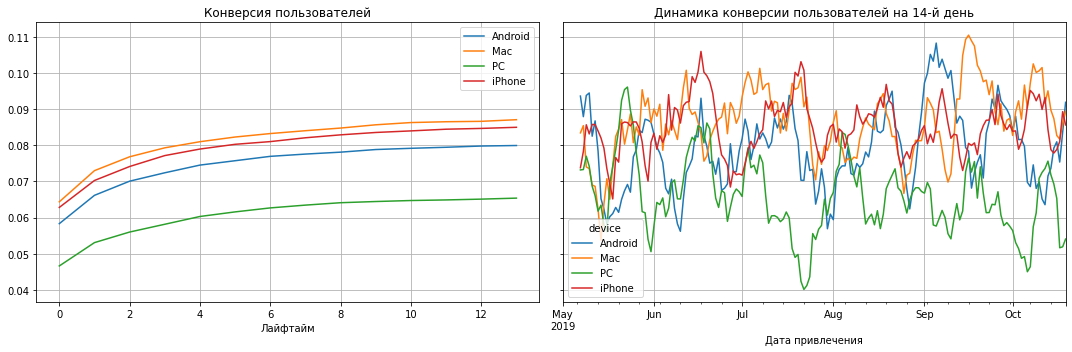

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
                                                                        profiles_without_organic,
                                                                        orders,
                                                                        observation_date,
                                                                        horizon_days,
                                                                        dimensions=dimensions
                                                                        )


plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Промежуточный итог:** конверсия пользователей `ПК` намного ниже, чем у остальных, хотя такие пользователи имеют больше окупаемости на таймлайне, чем остальные.

##### Построим графики удержания пользователей в разрезе устройств

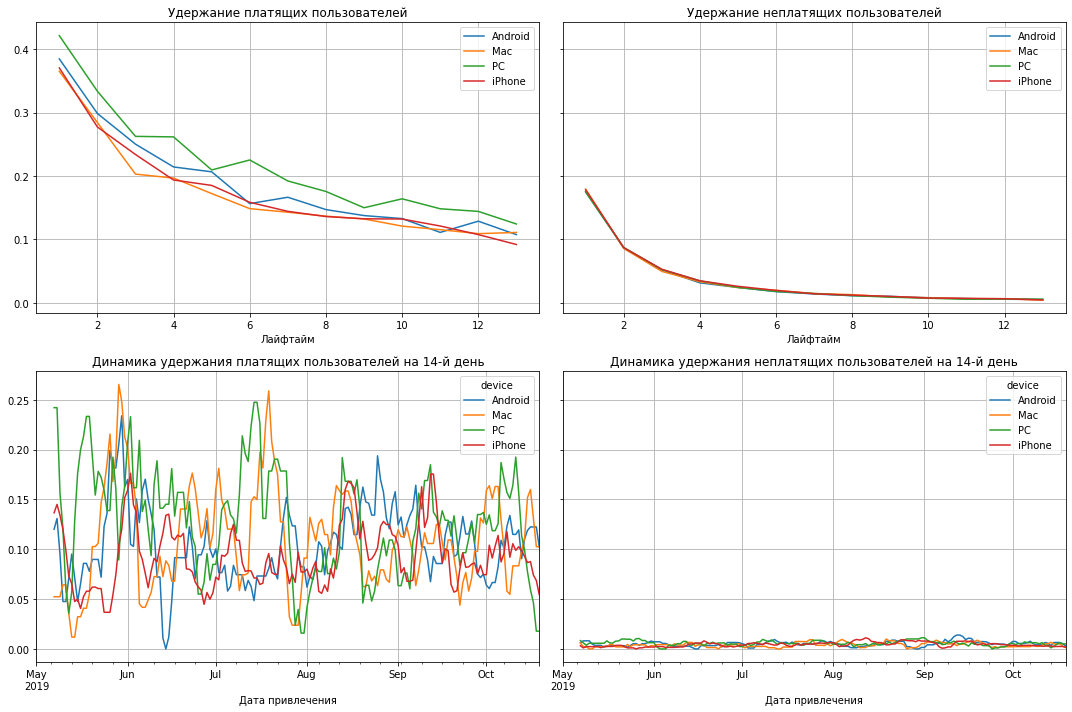

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
                                                                    profiles_without_organic,
                                                                    visits,
                                                                    observation_date,
                                                                    horizon_days,
                                                                    dimensions=dimensions
                                                                    )

plot_retention(retention_grouped, retention_history, horizon_days)

**Промежуточный итог:** графики удержаний пользователей все на одном и том же уровне и соответсвуют общим графикам без разбивки. Думаю, дело не в разнице удержаний пользователей с отличными друг от друга устройствами.

#### Анализ окупаемости рекламы в разбивке по странам

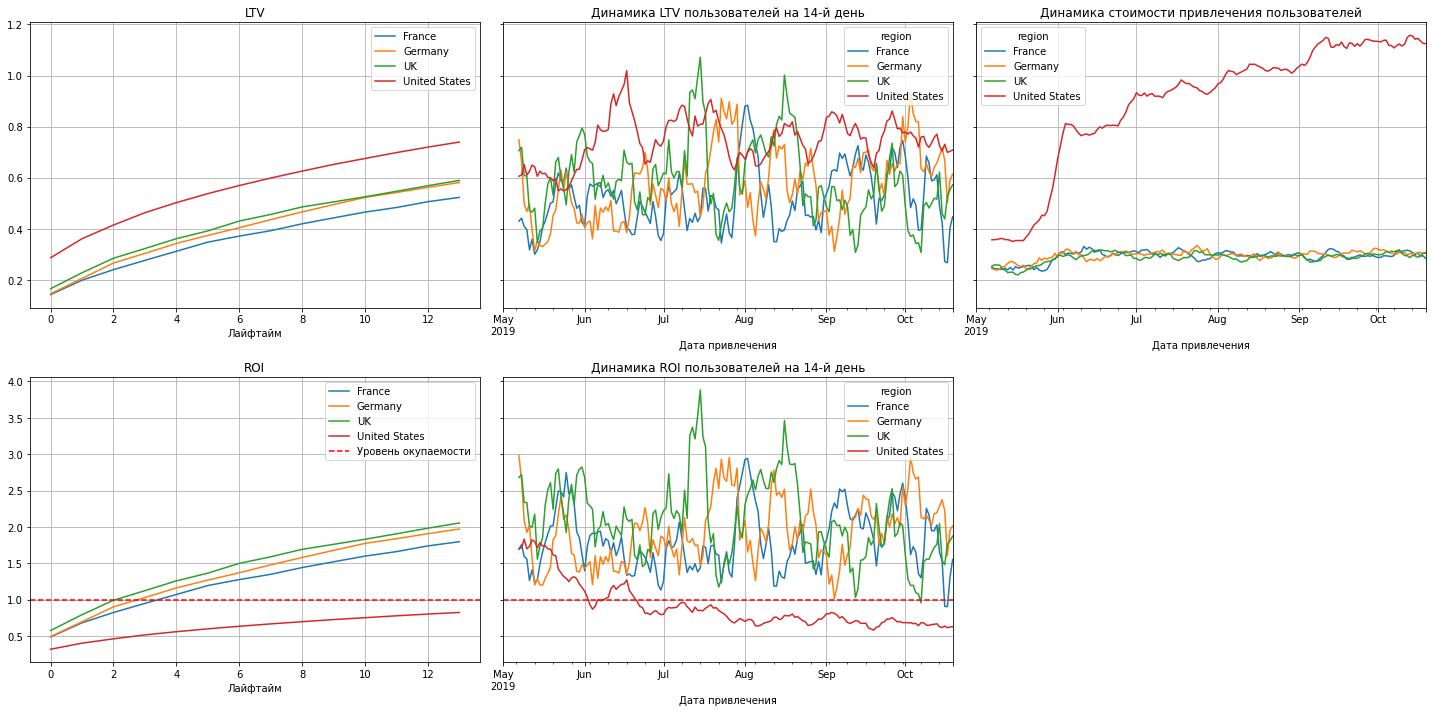

In [ ]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
                                                                      profiles,
                                                                      orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=dimensions
                                                                      )

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Промежуточный итог:** интересно, что пользователи из `США` не окупаются уже с июня не окупается. Стоит отметить, что пользователи доля плательщиков в `США` самая высокая, как и стоимость их привлечения (разница достигает 80% в сравнении с другими странами). За последние 14 дней пользователи из `США` стабильно <u>не окупаются</u>.

При этом пользователи из других стран стабильно окупаются - это может говорить об удобстве и(или) других факторов, влияющих на пользователей из остальных стран, нежели пользователей из `США`.

#### Рассмотрим подробнее пользователей в разбивке по странам

##### Графики конверсии пользователей

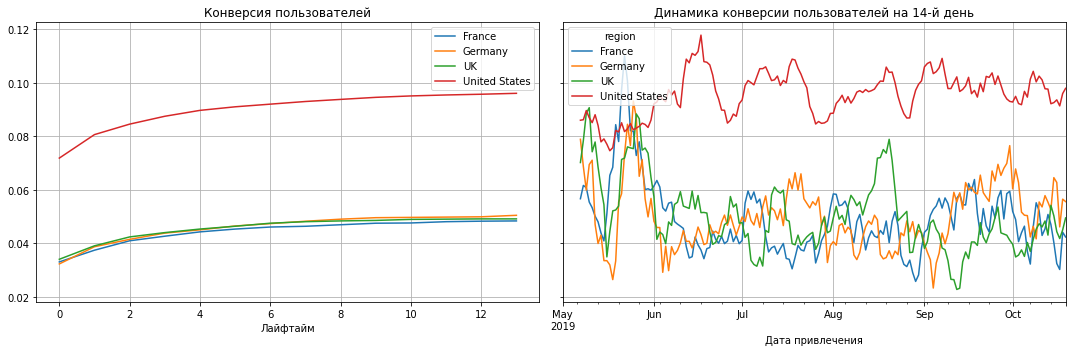

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
                                                                        profiles_without_organic,
                                                                        orders,
                                                                        observation_date,
                                                                        horizon_days,
                                                                        dimensions=dimensions
                                                                        )


plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Промежуточный итог:** конверсия явно выше у пользователей из `США` (на всем периоде примерно на 10% - 20%), при чем на всем периоде, кроме мая - июня.

##### Удержание пользователей в разрезе стран

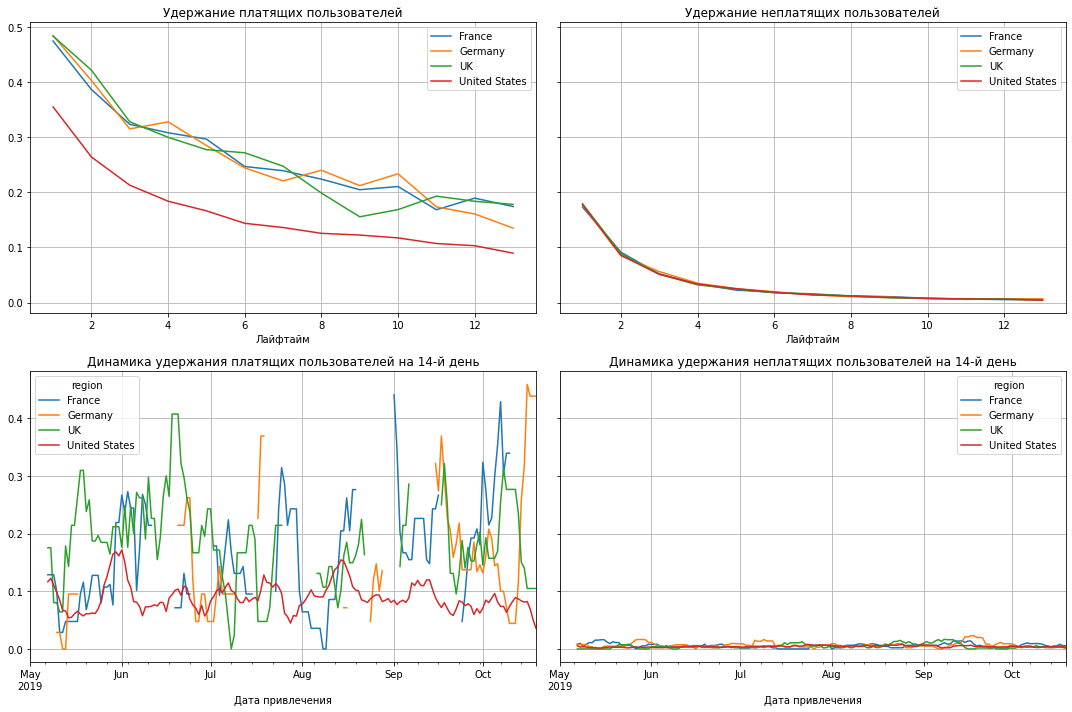

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
                                                                    profiles_without_organic,
                                                                    visits,
                                                                    observation_date,
                                                                    horizon_days,
                                                                    dimensions=dimensions
                                                                    )

plot_retention(retention_grouped, retention_history, horizon_days)

**Промежуточный итог:** Удержание платящих и неплатящих пользователей различных стран схожи с общими графиками удержаний. Здесь стоит отметить график удержания пользователей из `США` - они удерживаются хуже всего. Видимо, поэтому релкама у таких пользователей не окупается.

#### Анализ окупаемости рекламы в разбивке по рекламным источникам

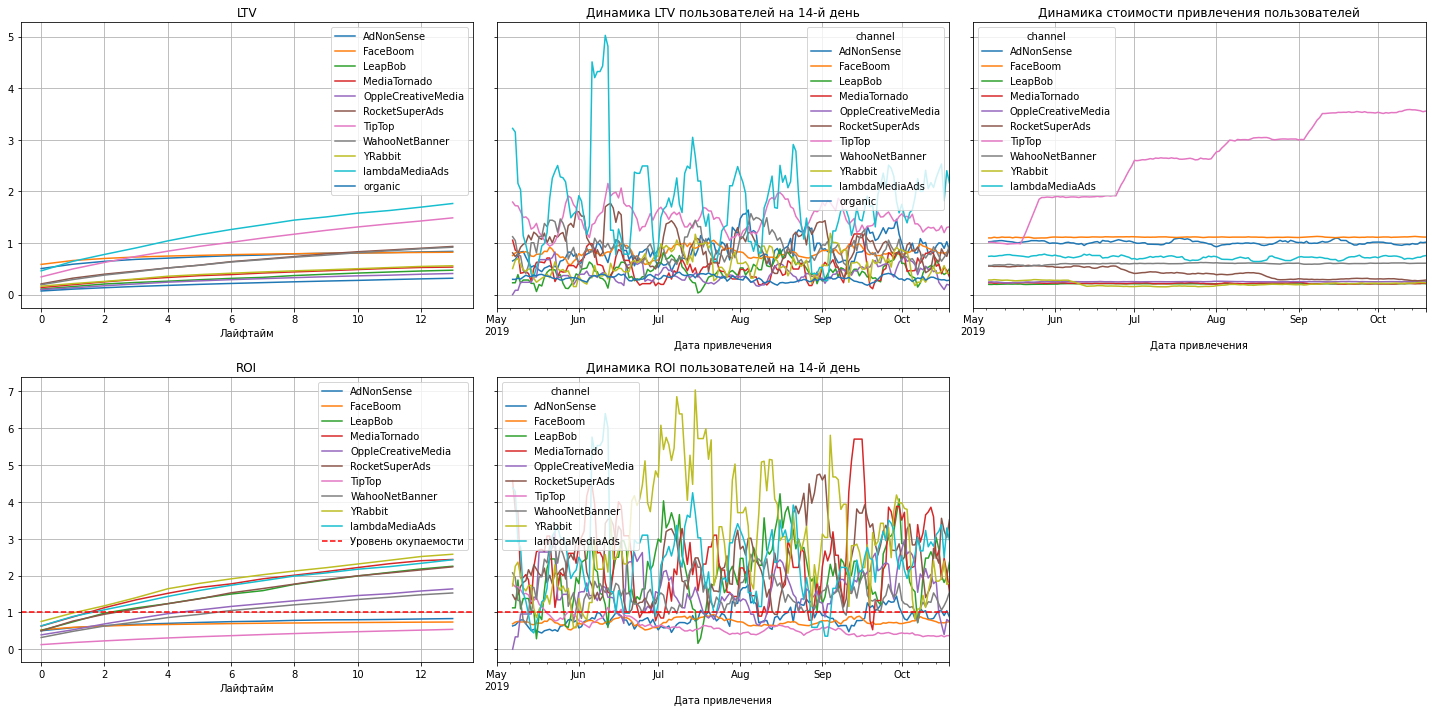

In [ ]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
                                                                      profiles,
                                                                      orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=dimensions
                                                                      )

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**Промежуточный итог:** LTV у всех пользователей в разрезе рекламных источников имеет положительную динамику. Найбольшую ценность представляют пользователи, привлеченные с `LambdaMediaAds` и `TipTop`.

У пользователей, привлеченных с `TipTop` слишком высоквая динамика стоимости и, в следствии, высокий разрвыр между остальными источниками. При этом на графике ROI можно увидеть, что сервис `TipTop` <u>не окупается должным образом</u>.

#### Расммотрим подробнее графики пользователей в разбивке по рекламным источникам

##### Конверсия пользователей в разбивке по источникам

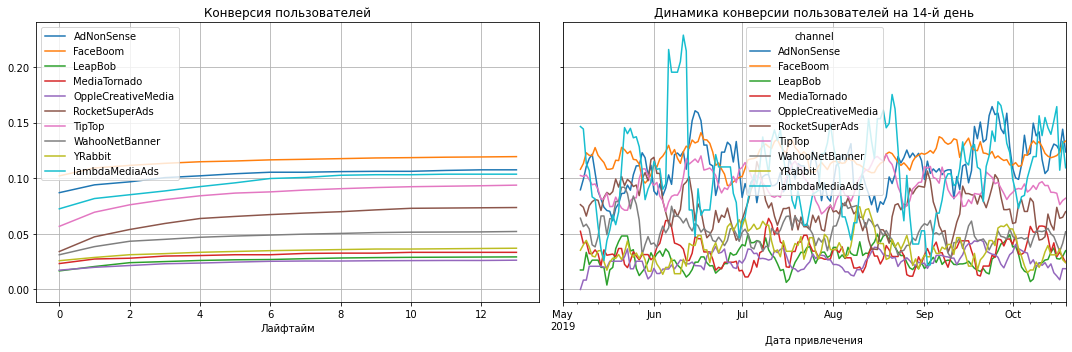

In [ ]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
                                                                        profiles_without_organic,
                                                                        orders,
                                                                        observation_date,
                                                                        horizon_days,
                                                                        dimensions=dimensions
                                                                        )


plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Промежуточный итог:** лидером конверсии является источник `FaceBoom`, на который потрачено высокая сумма средств (по сравнению с другими источниками). Также такие источники, как `lambdaMediaAds` и `AdNonSense`, на которые было затрачено меньше средств, показывают конверсию выше, чем `TipTop`.

##### Удержание пользователей в разбивке по источникам

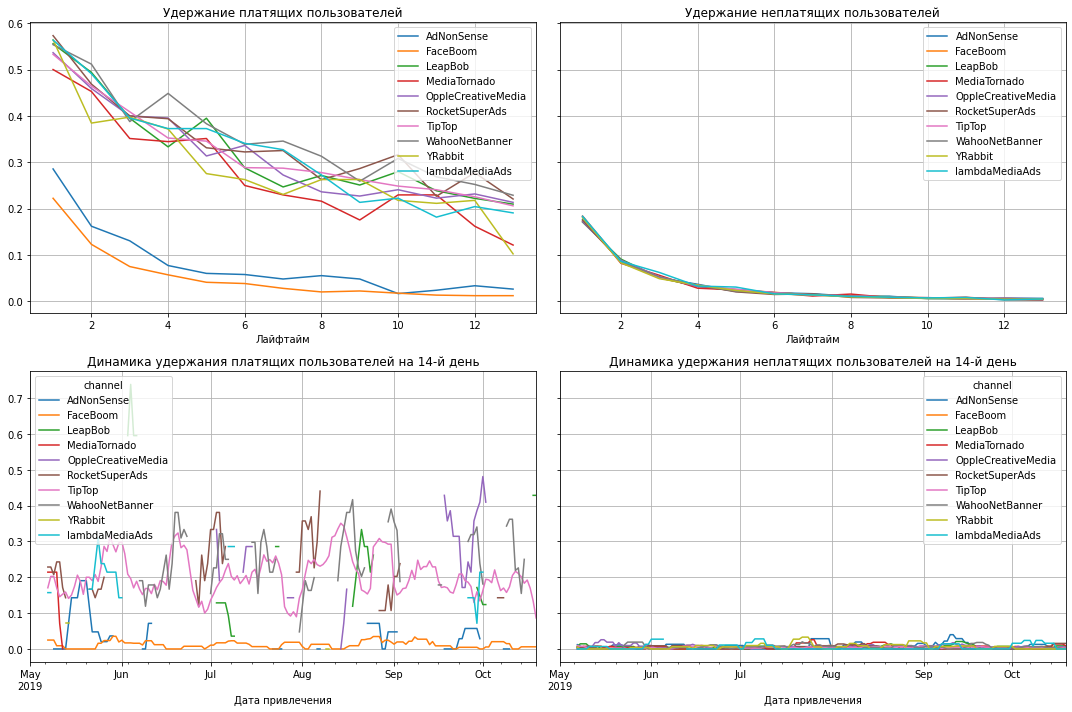

In [ ]:
retention_raw, retention_grouped, retention_history = get_retention(
                                                                    profiles_without_organic,
                                                                    visits,
                                                                    observation_date,
                                                                    horizon_days,
                                                                    dimensions=dimensions
                                                                    )

plot_retention(retention_grouped, retention_history, horizon_days)

**Промежуточный итог:** тут уже видно слишком <u>низкое удержание</u> пользователей из источников `FaceBoom` и `AdNonSense` - в среднем на 20% - 30%.

**Промежуточный выводы:** были построены общие графики LTV, ROI, CAC, конверсий и удержаний, а также в разрезах по странам, устройствам и рекламным источникам. Отметим интересные моменты и ответим на вопросы.

**Общие итоги**:
- В общем пользователи не окупаются (пик разницы составил 20%), но стоимость привлечений растет в процессе всего периода (с каждым месяцем возврастает на 10% - 15%);
- Неплатящие пользователи практически не удерживаются;
- В общем окупаются только пользователи ПК, при этом стоимость привлечения пользователей Mac и Iphone намного дороже - на 10%, а конверсия пользователей ПК выше остальных - на 10% - 15%;
- Пользователи из США не окупаются бОльшую часть времени (до июня), при этом пользователи их США самые дорогие, динамика показала постоянный рост стоимости пользователей из США (резкий рост составил с июня), а разница стоимости с другими старанами ~80%;
- Удержание пользователей из США намного ниже остальных (на 15% - 20%) - это говорит о том, что у пользователей возникают какие-либо проблемы в процессе взаимодействия с продуктом;
- Стабильно не окупается рекламный сервис TipTop, на который было выделено более 50% расходов, также не окупаются источники FaceBoom и AdNonSense, при том, что траты на данные сервисы также выше остальных;
- Стоит отметить, что хуже удерживаются пользователи только у FaceBoom и AdNonSense. При этом конверсия у таких пользователей наивысшая.

**Актуальные вопросы:**

**Окупается ли реклама, направленная на привлечение пользователей в целом?**

Нет, не окупается. Я думаю, проблема заключается в выборе рекламных источников и расходов на них. TipTop не окупается практически на всем периоде, а вот те источники, на которые мало обращено внимание, показывают результаты выше и стабильнее: YRabbit, MedioTornado и lambdaMediaAds - такие источники окупаются, отсутствует такой резкий рост расходов на пользователя, а также высокая конверсия и окупаемость.

Также что-то произошло с пользователями из США в июне или, возможно, на это повлияло резкое подорожание рекламный кампаний. Резкое подорожание пользователей и низкая окупаемость говорят именно об этом.

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

Из устройств можно выделить пользователей Mac и Iphone - такие пользователи окупаются меньше остальных, у них высокая конверсия, при этом наименьшее удержание (на 5% - 10% ниже остальных);

Из стран можно выделить США - явно не окупается, при этом стоимость пользователей оттуда только растет. Думаю, нужно отметить резкое подорожание стоимость с июля, так как перед ним реклама окупалась, а в июле было замечено резкое подорожание - в 2 раза!

Из каналов можно выделить самый дорогостоящий - TipTop. Реклама у данного источника не окупалась никогда, при этом конверсия не остается выше остальных, как с двумя примерами выше. При этом удержание пользователей остается на таком же уровни, как у большинства других рекламных сервисов.

### Общий вывод

**Выводы:**

Отметим важные моменты, на которые стоит обратить внимание, на каждом этапе:

**Первый этап:** Ознакомление с таблицами и данных в них:
- Были изменены наименования колонок для упрощенного взаимодействия с таблицами;
- Пропусков и дубликатов не обнаружено;

**Второй этап:** были добавлены функции для расчета бизнес-показателей:
- Для расчета LTV, ROI, CAC, конверсий и удержаний пользователей;
- Для визуализации LTV, ROI, CAC, конверсий и удержаний пользователей;

**Третий этап:** исследовательский анализ данных:
- В США наивысшая доля плательщиков - 7% от всех пользователей, все остальные представленные страны находятся на одном уровне ~4% плательщиков;
- Доля плательщиков в разрезе устройств составляют ~6%, кроме ПК - 5%;
- FaceBoom, AdNonSense, lambdaMediaAds имеют наивысшие показатели среди рекламных источников по доле плательщиков - до 10% - 12% у данных источников.

**Четвертый этап:** исследование в части маркетинга:
- Затраты на сервис TipTop на данный момент в 2 раза выше остальных расходов на рекламу - выше 50 тысяч долларов. Далее по расходам идет сервис FaceBoom - более 30 тысяч долларов. Остальные источники не превышают 5 тысяч расходов;
- Большинство расходов идут на TipTop и FaceBoom в пике на 37 - 40 недели. Расходы составили более 6 тысяч и 2 тысяч соответствено;
- С каждым месяцем расходы на сервис TipTop увеличиваются на 5% - 10%;
- Самое дорогое привлечение пользователя составляет в рекламном источнике TipTop (более 2.5 долларов), FaceBoom (более 1 доллара), AdNonSense (1 доллар).

**Пятый этап:** оценка окупаемости рекламы:
- На всем промежутке общий LTV плавно растет;
- Реклама не окупается (показатель ROI меньше достигает только 80%);
- Общая динамика стоимости привлечения расчет с каждым новым периодом;
- Неплатящие пользователи почти не удерживаются;
- Среди устройств пользователь единственный, кто окупается - пользователи ПК, но в то же время, такие пользователи хуже конвертируют
- Среди стран пользователь можно выделить США. Пользователи оттуда не окупаются с июня, при этом с июня резко возросли расходы в 2 раза на привлечение пользователей, а удерживаются такие пользователи хуже всего (на 10% показатель удержания ниже, чем у других стран);
- Среди рекламных источников хочется отметить TipTop. Данный источник не является прибыльным, не так хорошо конверсирует (по сравнению с первым источником показатели ниже на ~10%), при этом каждый месяц расходы на данный источник возврастают на 5% - 10%.
- Среди рекламных источников также выделяются FaceBoom и AdNonSense - пользователи из данных источников удерживаются намного хуже, чем остальных (на ~50% показатели ниже).

**Рекомендации:**
- Думаю, стоит увеличить рекламные кампании для пользователей с ПК - на данный момент такие пользователи хуже конвертируют, чем остальные (показатели ниже на 30%), а удерживаются такие пользователи на том же уровни с другими устройствами;
- Необходимо обратить внимание на резкий рост расходов на рекламу для пользователей из США. Возможно, из-за таких высоких расходов пользователи не окупаются (до июня пользователи из США имели положительные показатели);
- Стоит рассмотреть ситуацию, при которой нужно снизить расходы у источника TipTop и обратить внимание на другие источники, которые демонстрируют более положительные показатели. Такие, как lambaMediaAds (высокая конверсия, окупаемость и удержание), YRabbit (конверсия ниже, окупаемость и удержание на высоком уровне);
- Стоит собрать информацию о том, насколько "актуален" рекламный сервис в США. По совокупности показателей рынка страны (использование Mac и Iphone, рекламных источников TipTop и FaceBoom, а также в целом пользователи США) мы видим низкую окупаемость на каждом шагу, которая может сопровождаться другими низкими показателями. И повышение трат на рекламные сервисы явно не улучшают ситуацию. Думаю, стоит пересмотреть подход в целом на пользователей из США и другие состваляющие, которые помогут разобраться в низкой окупаемости приложения;
- Также думаю, можно обратить внимание на сервис FaceBoom, так как источник имеет высокую конверсию, но при этом у источника одно из низких удержаний пользователей. Возможно, пользователи из США имеют какие-либо проблемы с взаимодействием с данным источником, из-за чего возникают низкие показатели в части удержания пользователей и окупаемости (добавить дополнительные промокоды/привелегии после перехода по источнику, разобраться в технических ошибках).